# TREE AGE DATA SET #

## IMPORT MODULES ##

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
import math
from pandas.stats.api import ols
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as m_sel
import plotly.offline as plot
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.utils import shuffle
plot.offline.init_notebook_mode(connected=True)

## LOAD DATA ##

In [4]:
data_df = pd.read_csv('/home/user/Downloads/Ex02_TreeData_Regreesion.csv')
data_df = shuffle(data_df)
data_df.dropna(axis = 0, inplace=True)

## CORRELATION MATRIX ##

In [5]:
correlation_matrix = data_df.corr()
correlation_matrix

,N0,Nt,pH,PetalCount,Age
N0,1.000000,0.080825,0.053488,0.127779,-0.058794
Nt,0.080825,1.000000,0.003821,-0.003614,-0.980478
pH,0.053488,0.003821,1.000000,0.099505,0.007455
PetalCount,0.127779,-0.003614,0.099505,1.000000,0.053744
Age,-0.058794,-0.980478,0.007455,0.053744,1.000000


## CORRELATION GRAPH ##

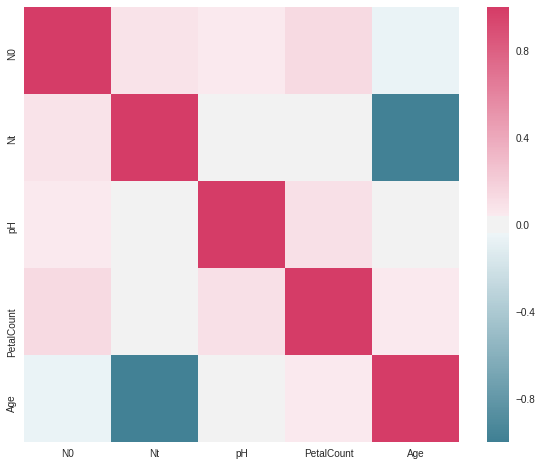

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 1, as_cmap=True),
            square=True, ax=ax)
plt.show()

## SCATTER GRAPH ##

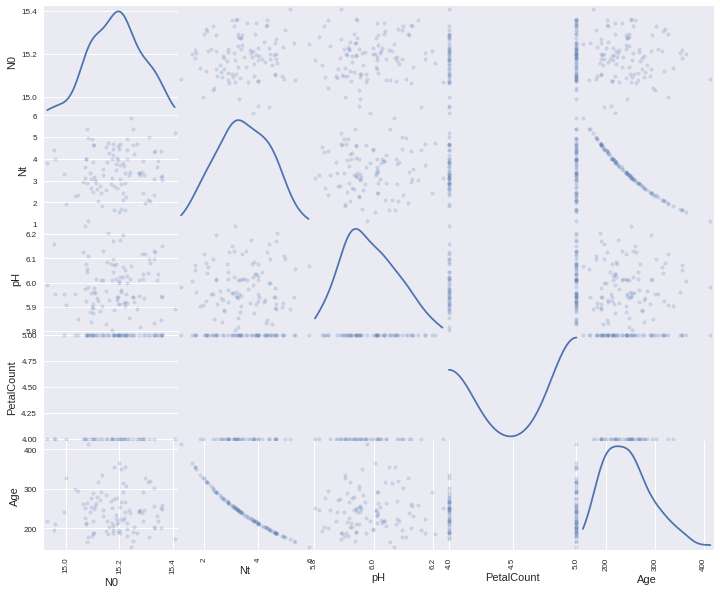

In [7]:
pd.scatter_matrix(data_df, alpha=.2, figsize=(12,10), diagonal='kde')
plt.show()

## NORMALIZING DATA ##

In [8]:
data_norm=data_df
for i in data_norm.columns.tolist():
    data_norm[i] = (data_norm[i] - data_norm[i].mean())/(data_norm[i].var())

## SPLITTING TRAINING AND TESTING DATA ##

In [9]:
X_rl = pd.get_dummies(data_norm).drop('Age', axis=1)
y_rl = data_norm.Age
X_train, X_test , Y_train, Y_test = m_sel.train_test_split(X_rl, y_rl, test_size=0.30, random_state=20)

## LINEAR REGRESSION MODEL ##

In [10]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train, Y_train)
print ('Coefficients : ', reg.coef_) 
print ('\nIntercepts  : ', reg.intercept_)
print ('\nRoot Mean Square Error : ', math.sqrt(np.mean((reg.predict(X_test) - Y_test) ** 2)))

Coefficients :  [  3.00583603e-05  -2.01351092e-02  -2.79911958e-06   4.79208477e-04]

Intercepts  :  -0.000180692823198

Root Mean Square Error :  0.0038104125062124205


## REGRESSION MODEL PLOT ##

In [13]:
trace1 = go.Scatter(
    x=reg.predict(X_test),
    y= Y_test,
    mode='markers',
    name = 'Predicted vs Original',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x= Y_test,
    y= Y_test,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace1, trace2]
layout = dict(
    title='SCATTER PLOT FOR REGRESSION MODEL',
    xaxis=dict(
        title='PREDICTED VALUE '
    ),
    yaxis=dict(
        title='ORIGINAL VALUE'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='TREEAGE_Regression Model')


## HISTOGRAM FOR REGRESSION ##

In [14]:
data = [go.Histogram(x=((reg.predict(X_test) - Y_test)))]
layout = go.Layout(
    title='FREQUENCY OF RESIDUALS',
    xaxis=dict(
        title='RESIDUALS'
    ),
    yaxis=dict(
        title='FREQUENCY'
    )
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='histogram')

## BOX PLOT FOR REGRESSION ##

In [15]:
trace1 = go.Box(
    y = (reg.predict(X_test) - Y_test)
)
data = [trace1]
plot.iplot(data)

## RIDGE REGRESSION ##

In [16]:
alphas = np.logspace(-3,3,300)
ridge = linear_model.Ridge(normalize=True)
coefs = []
mean_errors = []

column_name1 = X_train.columns.tolist()
column_name = column_name1
column_name.append('alpha')
df = pd.DataFrame(index=list(range(len(alphas))),columns=column_name)
s = 0
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,Y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test) 
    mean_errors.append(mean_squared_error(Y_test, pred))
    k=0
    while (k < len(column_name)-1):
        df.loc[s,list(df.columns)[k]] = ridge.coef_[k]
        k = k+1
    df.loc[s,'alpha'] =a    
    s=s+1
m=column_name1.pop()   

## WEIGHT VS ALPHA ##

In [17]:
data = []
for i in column_name1:
    p = go.Scatter(x= df.alpha, y= df.loc[:,i].tolist(), mode='lines+markers', name=i, hoverinfo='name', line=dict(shape='linear'))
    data.append(p)        
layout = dict(
     title='WEIGHTS VS ALPHAS',
    xaxis=dict(
        title='ALPHAS'
    ),
    yaxis=dict(
        title='WEIGHTS'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='WEIGHTS_VS_ALPHAS_TREEAGE')

## MEAN ERROR VS ALPHA ##

In [19]:
data = []
p = go.Scatter(x= alphas, y=mean_errors, mode='lines+markers', name='Mean Error', hoverinfo='name', line=dict(shape='linear'))
data.append(p)        
layout = dict(
    title='MEAN SQUARE ERROR VS ALPHAS',
    xaxis=dict(
        title='ALPHAS'
    ),
    yaxis=dict(
        title='MEAN SQUARE ERROR'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='MEANERROR_VS_APLHA_TREEAGE')

## LASSO ##

In [21]:
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit((X_train), Y_train)
    coefs.append(lasso.coef_)
coefs = np.array(coefs) 

## WEIGHT VS ALPHA ##

In [23]:
data = []
for beta in range(len(X_train.columns)):
    trace = go.Scatter(
        x = alphas,
        y = coefs[:,beta],
        mode='lines+markers',
        name = X_train.columns[beta],
        line=dict(shape='linear')
    )
    data.append(trace)
layout = dict(
    title='WEIGHTS VS ALPHAS',
    yaxis = dict(
        range = [-3,3],
        title='WEIGHT'
    ),
    xaxis = dict(
        range = [0,0.1],
        title='ALPHAS'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    ))

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='WEIGHT_VS_ALPHA_TREEAGE')

## LASSO CV ##

In [24]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

1.2950021979024625e-05

In [25]:
pd.Series(lasso.coef_, index=X_test.columns)

N0            0.000001
Nt           -0.019832
pH            0.000000
PetalCount    0.000359
dtype: float64

## OLS REGRESSION ##

In [27]:
ols_result = sm.ols(formula="Age ~ Nt + PetalCount", data = data_norm.iloc[:math.floor(len(data_norm)*0.70),:]).fit()
ols_result.params
predict_ols = ols_result.predict(X_test)
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     907.0
Date:                Sat, 01 Apr 2017   Prob (F-statistic):           3.03e-49
Time:                        16:17:57   Log-Likelihood:                 292.40
No. Observations:                  70   AIC:                            -578.8
Df Residuals:                      67   BIC:                            -572.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.32e-05      0.000      0.117      0.907      -0.001       0.001
Nt            -0.0195      0.000    -42.303      0.000      -0.020      -0.019
PetalCount     0.0004      0.000      1.976      0.052   -4.45e-06       0.001
==============================================================================
Omnibus:                       55.738   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.339
Skew:                           2.360   Prob(JB):                     7.28e-60
Kurtosis:                      11.432   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SCATTER PLOT FOR OLS ##

In [28]:
trace1 = go.Scatter(
    x=predict_ols,
    y= Y_test,
    mode='markers',
    name = 'PREDICTED VS ORIGINAL',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x= Y_test,
    y= Y_test,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace1, trace2]
layout = dict(
    title='PREDICTED VS ORIGINAL',
    yaxis = dict(
        title='PREDICTED VALUE'
    ),
    xaxis = dict(
        title='ORIGINAL VALUE'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='SCATTER PLOT FOR OLS')


## HISTOGRAM FOR OLS ##

In [29]:
data = [go.Histogram(x=((predict_ols - Y_test)))]
layout = go.Layout(
    title='FREQUENCY OF RESIDUALS',
    xaxis=dict(
        title='RESIDUALS'
    ),
    yaxis=dict(
        title='FREQUENCY'
    )
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='OLS_HISTOGRAM_SYSTOLICBP')

## BOX PLOT FOR OLS ##

In [30]:
trace1 = go.Box(
    y = (predict_ols - Y_test)
)
data = [trace1]
plot.iplot(data)